In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Источник данных: все данные былы созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html
Цель:
Найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров.
Что означают полученные кластеры?

In [220]:
df = pd.read_csv('CIA_Country_Facts.csv')

In [221]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [223]:
df.info() # посмотрим на строки и колонки в данных, в том числе на типы данных для колонок.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [224]:
df.describe().transpose() # вычисляет статистические характеристики данны, и транспонируем данные

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


<Axes: xlabel='Population', ylabel='Count'>

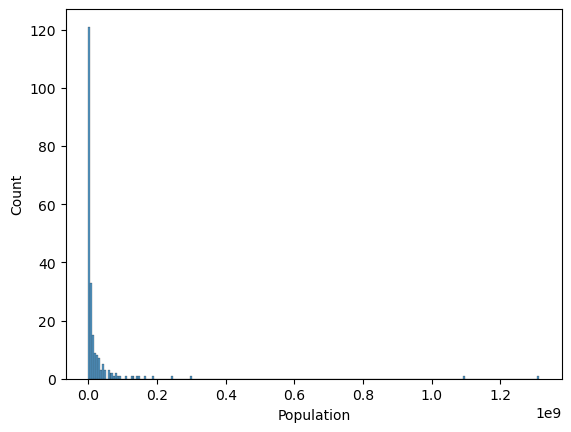

In [225]:
sns.histplot(data=df, x='Population') # построем гистограмму для колонки Population.

<Axes: xlabel='Population', ylabel='Count'>

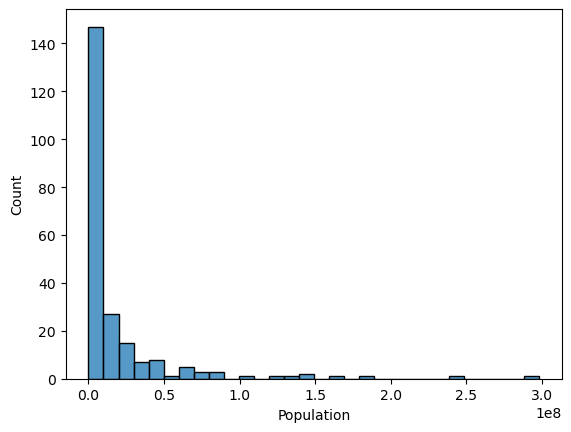

In [228]:
sns.histplot(data=df[df['Population']<500000000], x='Population',bins=30) #  отобразим только страны с населением меньше 0.5 миллиарда людей

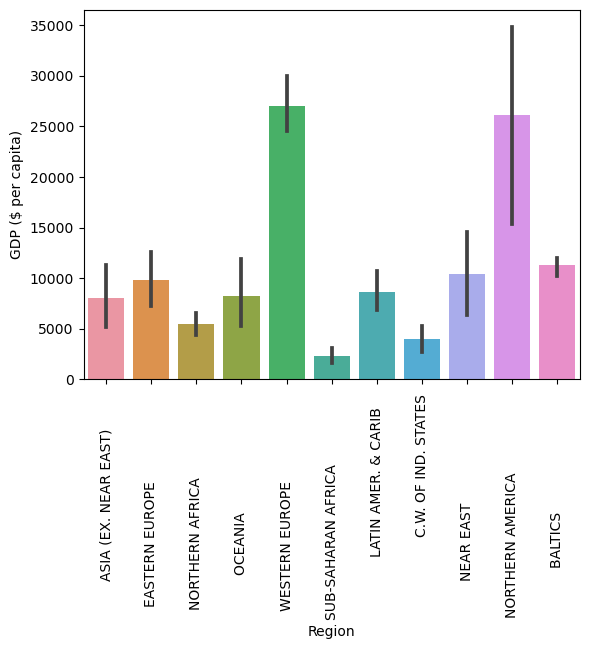

In [229]:
sns.barplot(df,x='Region',y='GDP ($ per capita)')# изобразим среднее ВВП на душу населения (GDP per Capita) для каждого региона.
plt.xticks(rotation=90);

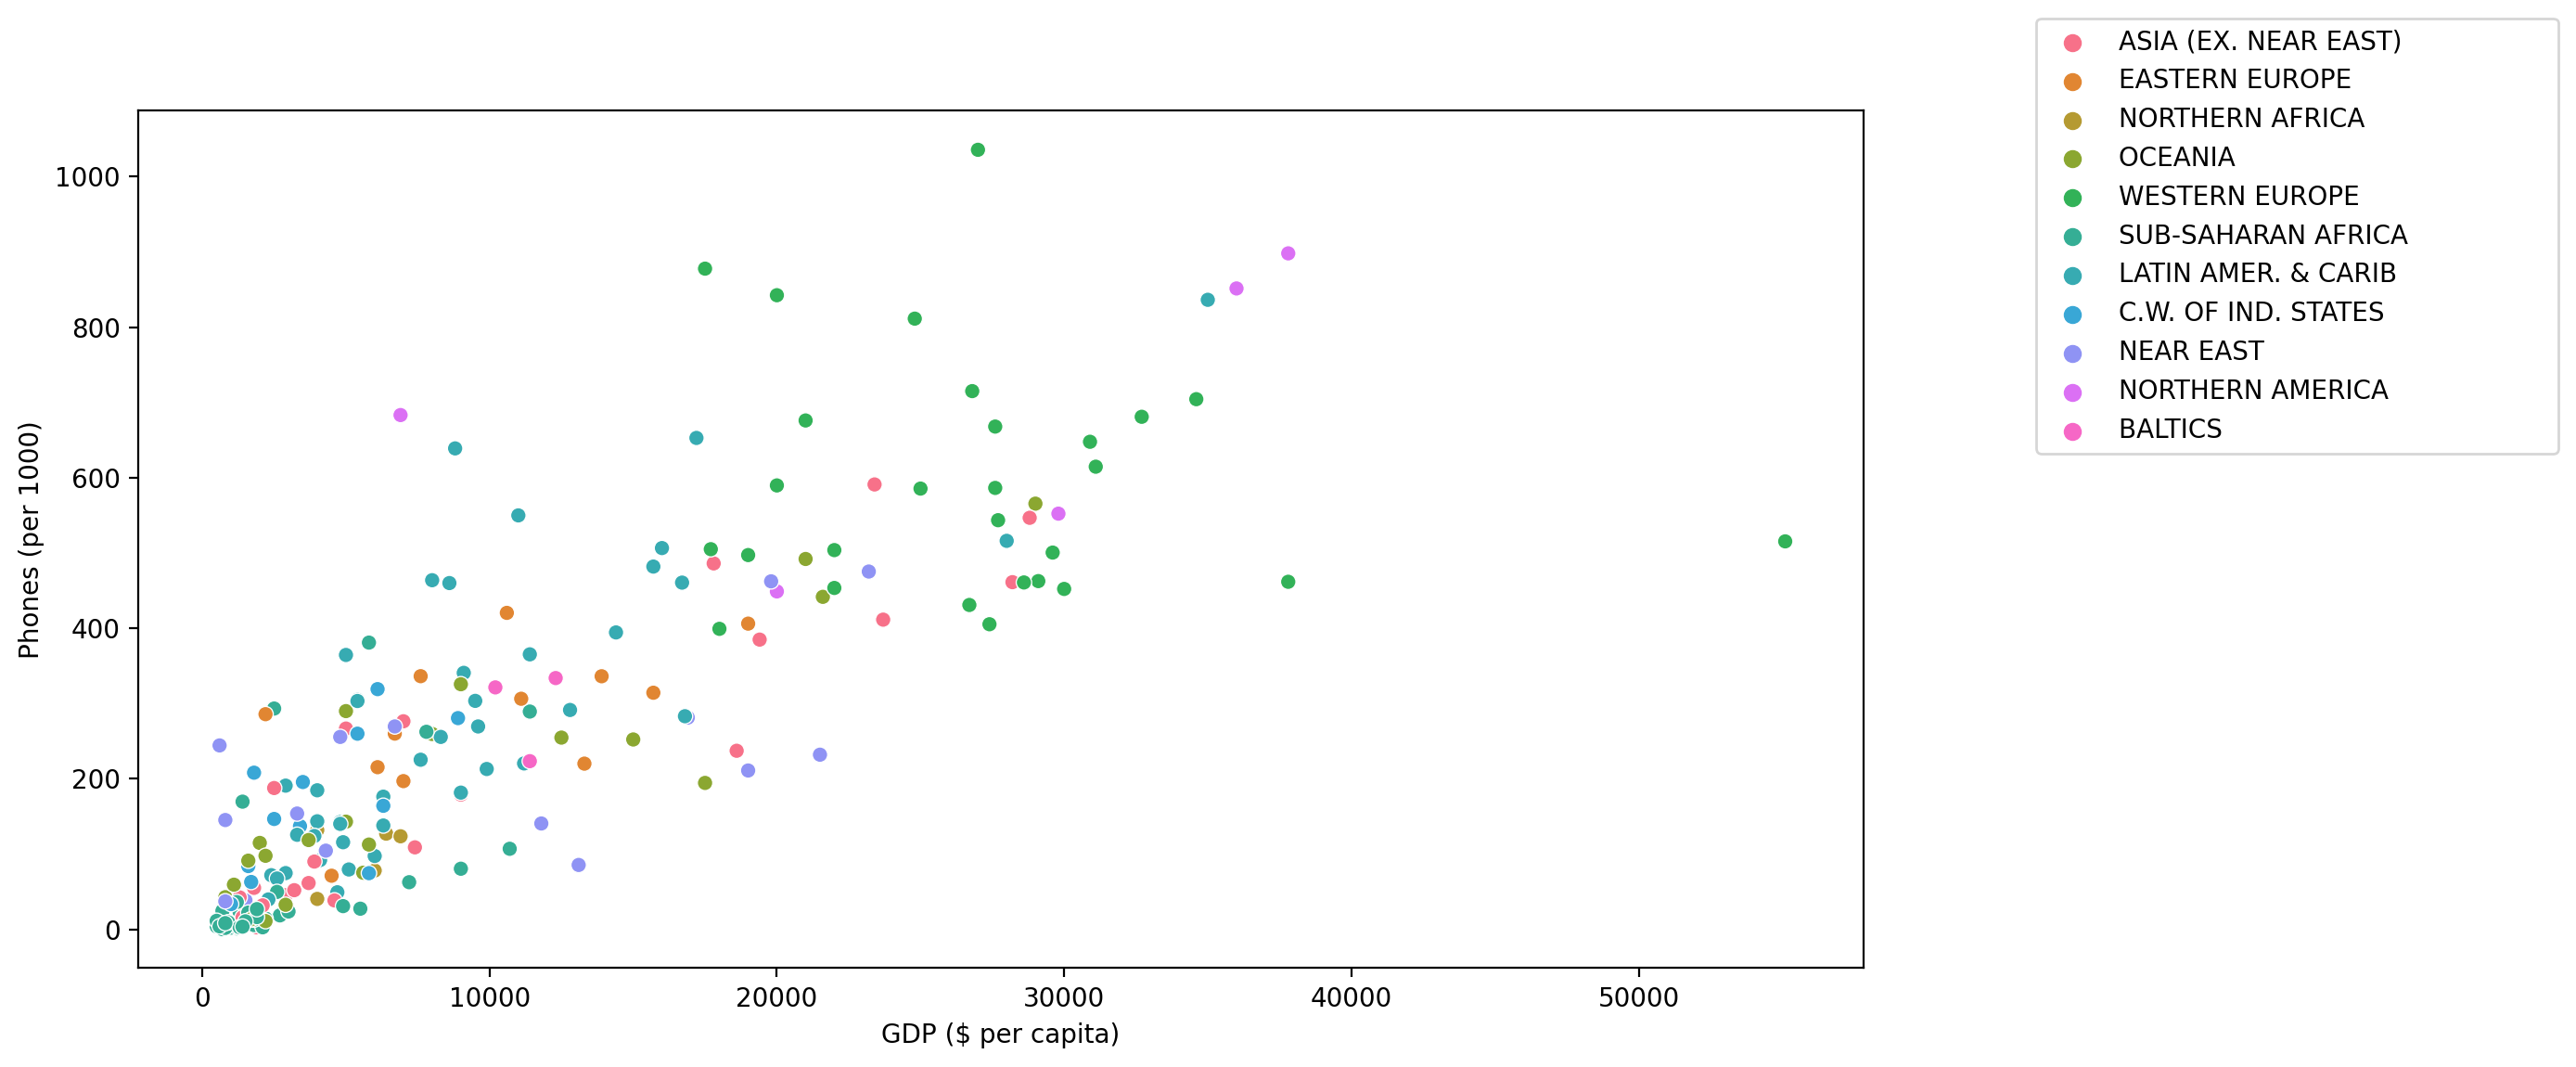

In [230]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(df,y='Phones (per 1000)',x='GDP ($ per capita)',hue='Region')
plt.legend(loc=(1.1,0.6))
# "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения"

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

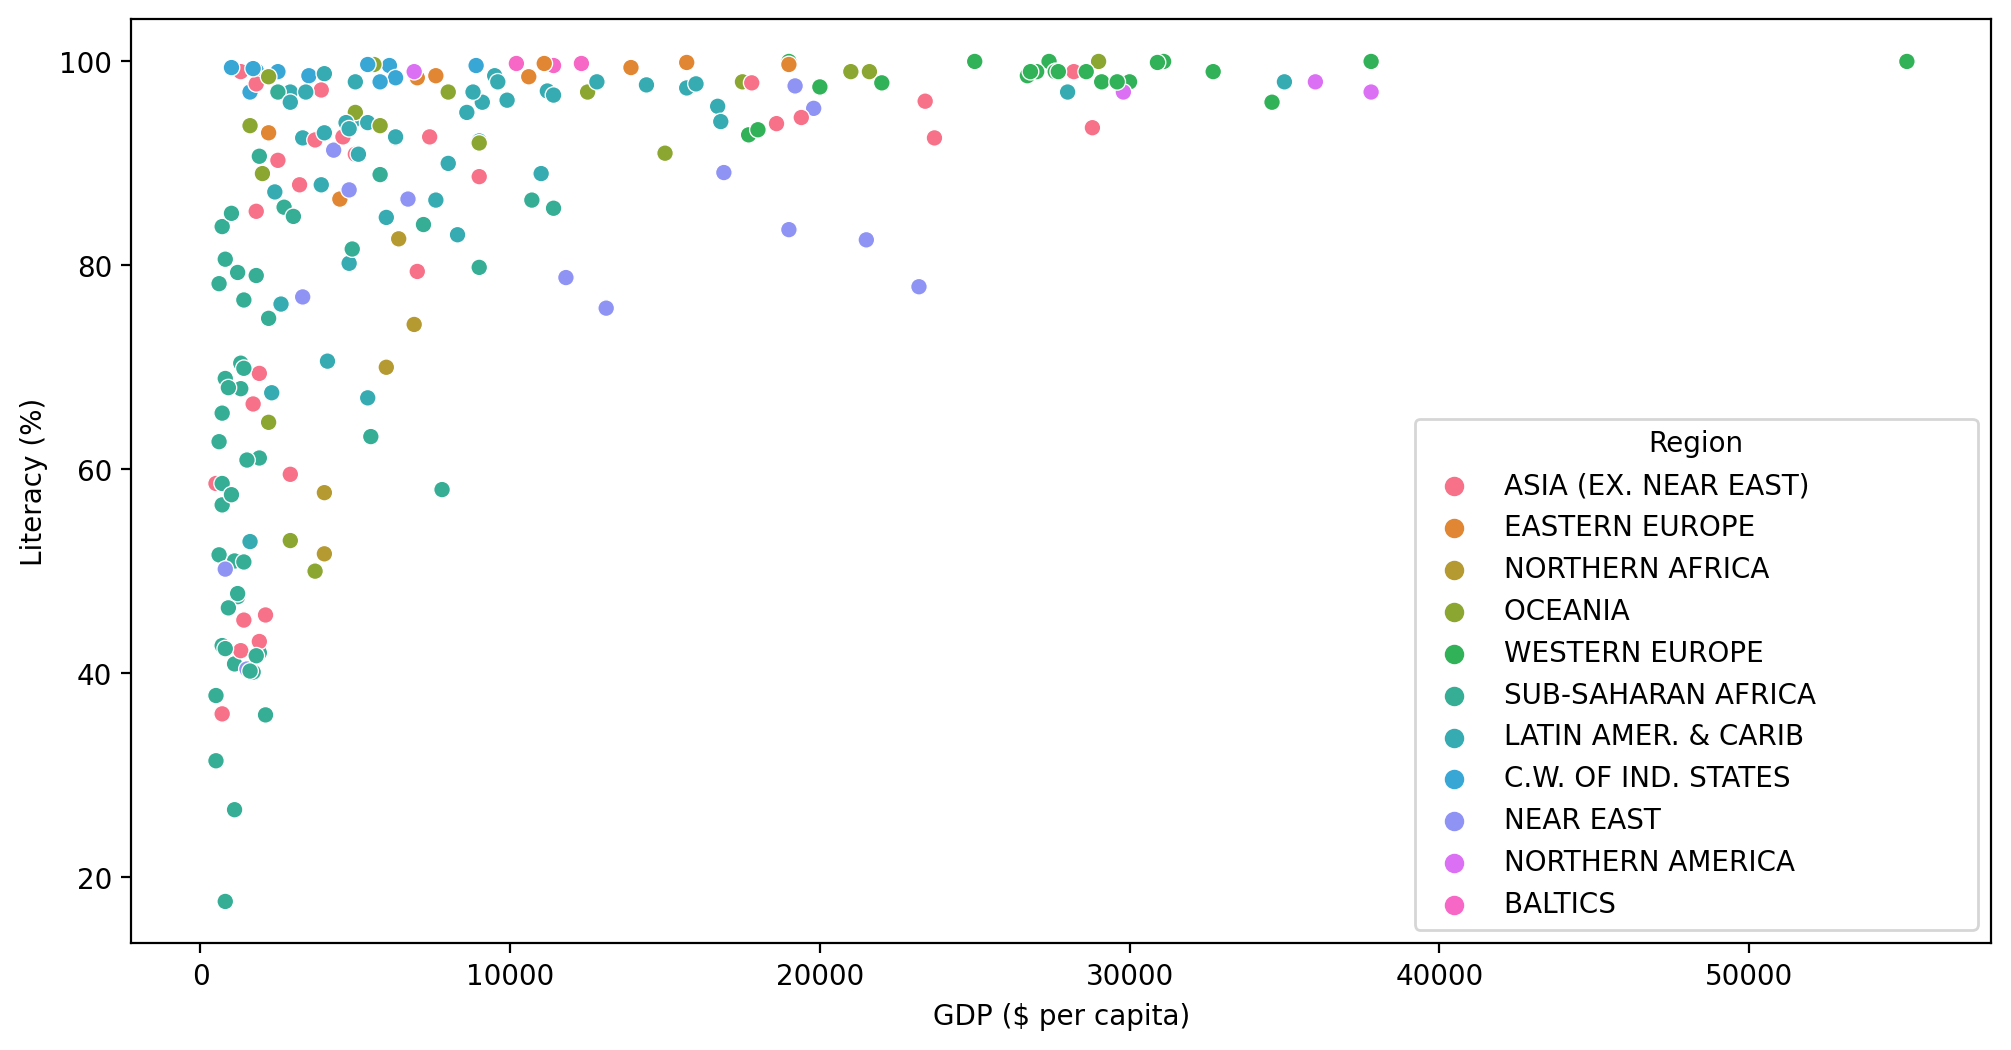

In [231]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(df,y='Literacy (%)',x='GDP ($ per capita)',hue='Region')

<Axes: >

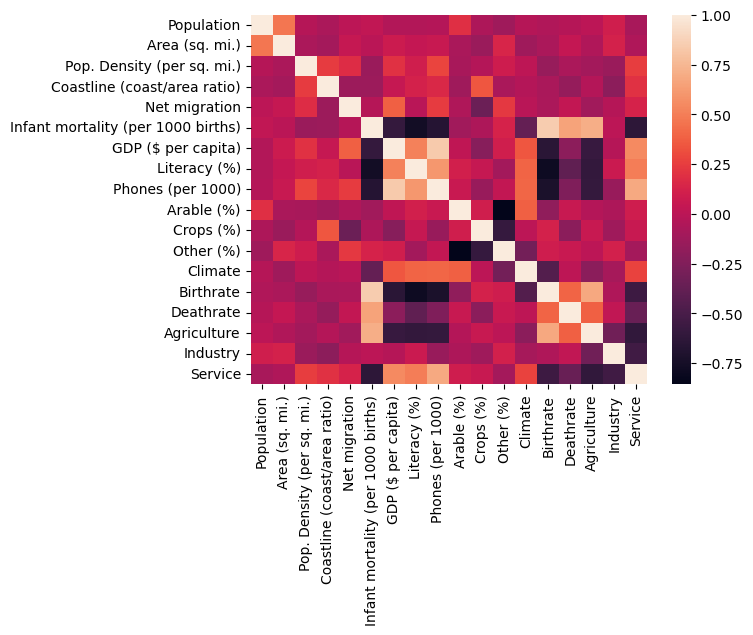

In [232]:
sns.heatmap(df.corr(numeric_only=True)) # тепловая карта Heatmap для корреляций между колонками в датафрейме.

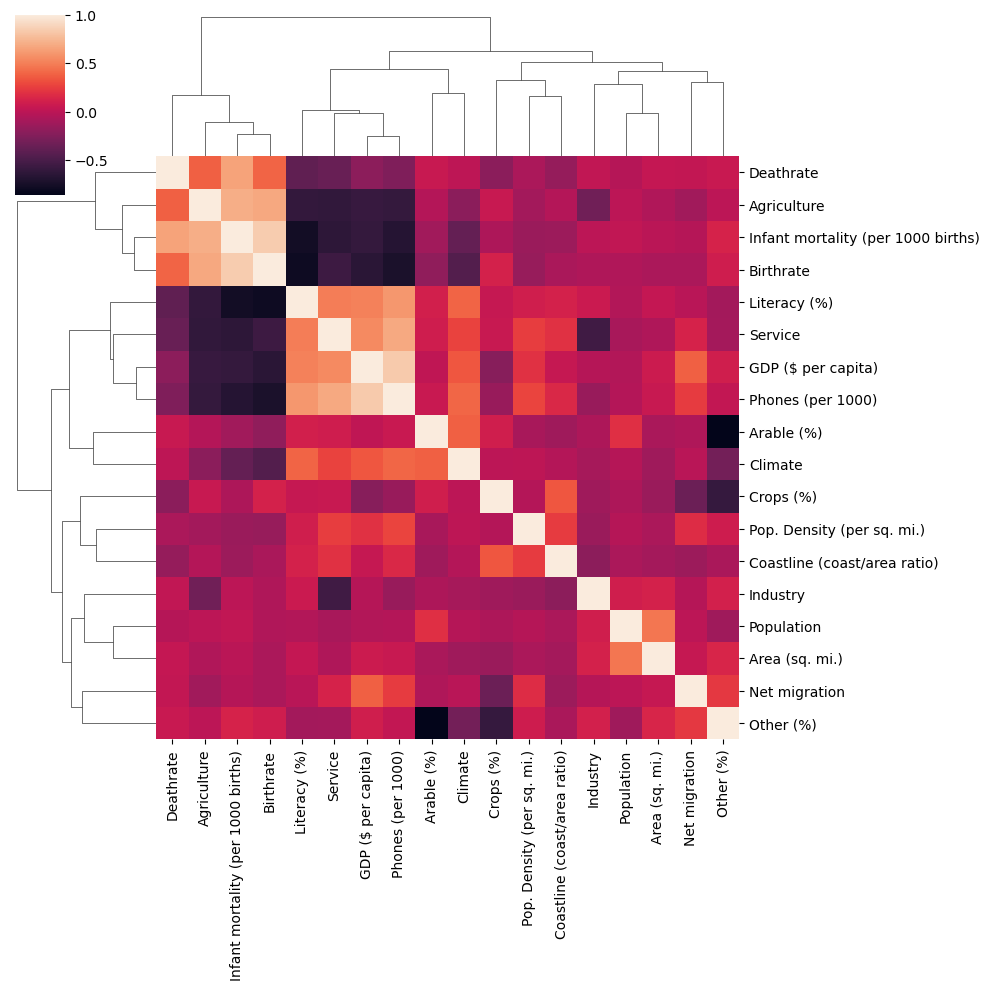

In [233]:
sns.clustermap(df.corr(numeric_only=True)) # график clustermap для корреляций между колонками датафрейма.

Подготовка данных и модель данных

In [234]:
df.isnull().sum() # отсутствующие значения в той или иной колонке.

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [235]:
df[df['Agriculture'].isnull()]=df[df['Agriculture'].isnull()].fillna(0)
# Заменим для этих стран отсутствующие значения нулями, потому что это очень маленькие страны. 

In [236]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [238]:
df.groupby('Region')['Climate'].transform('mean')

0      1.962963
1      3.111111
2      1.500000
3      2.000000
4      2.826087
         ...   
222    1.666667
223    1.500000
224    1.666667
225    1.846939
226    1.846939
Name: Climate, Length: 227, dtype: float64

In [239]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))
# заменим отсутствующие значения колонки Climate на средние значения этой колонки, 
# где усреднение выполняется для соответствующего региона.

In [240]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [241]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
# Заменим отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.

In [242]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [243]:
df = df.dropna() # удалим строки с отсутствующими значениями

In [244]:
X = df.drop('Country', axis=1) 
# Колонка Country является уникальным идентификатором, поэтому эта колонка не будет полезной для кластеризации.

In [245]:
X=pd.get_dummies(X) # создадим дамми-переменные.

In [246]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


In [247]:
from sklearn.preprocessing import StandardScaler # выполним масштабирование признаков с помощью Sklearn.

In [248]:
scaler = StandardScaler()

In [249]:
scaled_X = scaler.fit_transform(X)

In [250]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [251]:
from sklearn.cluster import KMeans

In [252]:
# будем подбирать оптимальные значение кластеров, 
# на каждом шаге будет сохранять сумму квадратов расстояний от точек до центра кластеров SSD
ssd = []
for K in range(2,30):
    model = KMeans(n_clusters=K)
    model.fit(scaled_X)
    ssd.append(model.inertia_) # значение инерции т.е сумма квадратов расстояний

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\

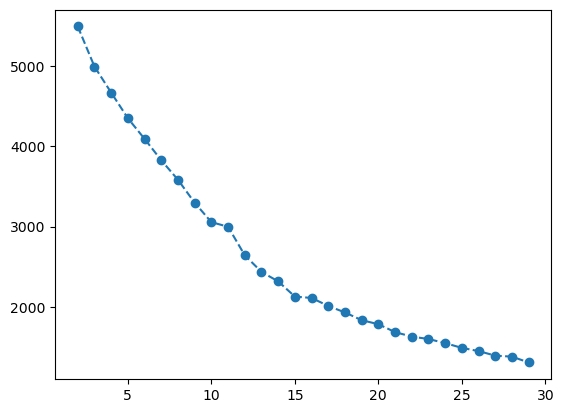

In [254]:
plt.plot(range(2,30),ssd,'o--')
# нанесум эти данные на график, изображая метрику SSD для различных значений К.

<Axes: >

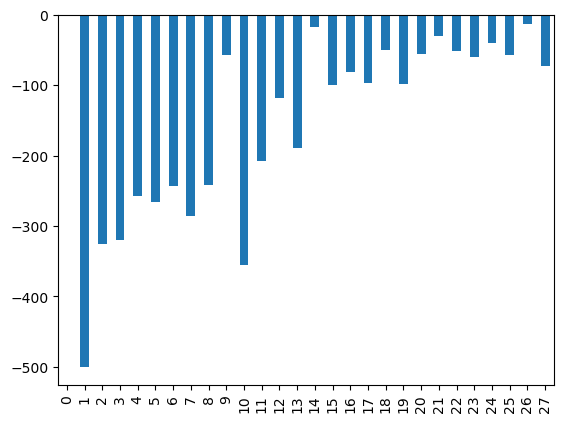

In [255]:
pd.Series(ssd).diff().plot(kind='bar')
# график barplot с изменениями метрики SSD.

Пример: выбираем K=3
Можно сказать, что в точке K=3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). 
Как может выглядеть картина для K=3?

In [256]:
my_model = KMeans(n_clusters=3)

In [257]:
my_model.fit(scaled_X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

In [258]:
my_model.labels_ #  отобразим какие признаки являются важными в случае 3 кластеров

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0])

In [259]:
X['K=3 Clusters'] = model.labels_

In [260]:
X.corr(numeric_only=True)['K=3 Clusters'].sort_values()

Region_WESTERN EUROPE                        -0.304149
Climate                                      -0.286967
Deathrate                                    -0.275714
Industry                                     -0.200675
Service                                      -0.176087
Literacy (%)                                 -0.170301
Region_SUB-SAHARAN AFRICA                    -0.169122
GDP ($ per capita)                           -0.162453
Region_BALTICS                               -0.106680
Region_EASTERN EUROPE                        -0.101099
Other (%)                                    -0.082447
Phones (per 1000)                            -0.079372
Region_ASIA (EX. NEAR EAST)                  -0.079177
Population                                   -0.061866
Region_NORTHERN AFRICA                       -0.015201
Area (sq. mi.)                               -0.010160
Infant mortality (per 1000 births)           -0.007706
Net migration                                -0.000213
Arable (%)

In [261]:
my_model_3 = KMeans(n_clusters=3) # Создадим кластеры.

In [263]:
my_model_3.fit(scaled_X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

Нанесем эти страны и кластеры на географическую карту.

In [264]:
iso_codes = pd.read_csv("../DATA/country_iso_codes.csv") # загрузим ISO-коды

In [265]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict() # преобразуем в словарь 

In [266]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [268]:
df['ISO Code'] = df['Country'].map(iso_mapping)

C:\Users\User\AppData\Local\Temp\ipykernel_5864\1751201090.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
df['Cluster'] = my_model_3.labels_
# Эта строка добавляет новый столбец с названием "Cluster" в DataFrame и заполняет его значениями, 
# которые были предсказаны моделью `my_model_3.labels_`.

C:\Users\User\AppData\Local\Temp\ipykernel_5864\735968046.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [272]:
import plotly.express as px
# Эта строка создает хороплетную карту. В аргументах:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    )
fig.show()

#- `df`: Это предполагается, что это DataFrame Pandas, содержащий данные для построения карты.
#- `locations="ISO Code"`: Это указывает на столбец в DataFrame, содержащий коды стран или регионов, которые будут использоваться для определения местоположения на карте.
#- `color="Cluster"`: Это указывает на столбец в DataFrame, содержащий данные, которые будут использоваться для определения цвета каждой области на карте. В данном случае, вероятно, `Cluster` содержит числовые значения, которые будут отображаться цветом на карте.
#- `hover_name="Country"`: Это указывает на столбец в DataFrame, содержащий названия стран или регионов, которые будут отображаться при наведении курсора на соответствующую область на карте.